# Natural Language Processing with Disaster Tweets

 #### Required imports

In [28]:
import numpy as np 
import pandas as pd 
import matplotlib.pylab as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

## Data exploration

#### Load data from CSV file, check data structure

In [29]:
df = pd.read_csv('data/train.csv')
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


Check ratio of disaster and non-disaster tweets

Text(0, 0.5, 'samples')

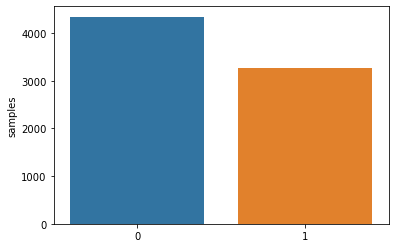

In [30]:
value_counts = df.target.value_counts()
sns.barplot(x = value_counts.index, y = value_counts)
plt.gca().set_ylabel('samples')

Check number of words in tweets

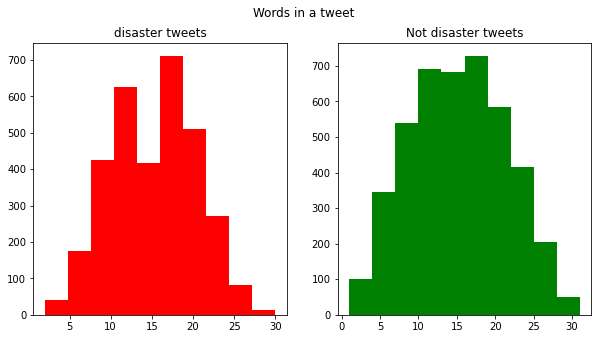

In [31]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=df[df['target']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len,color='red')
ax1.set_title('disaster tweets')
tweet_len=df[df['target']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='green')
ax2.set_title('Not disaster tweets')
fig.suptitle('Words in a tweet')
plt.show()

## Preparing data

 #### Split for test and train datasets

In [32]:

raw_text = df['text'].values
labels_train = df['target'].values
sentences_train, sentences_test, y_train, y_test = train_test_split(raw_text, labels_train, test_size=0.25, random_state=1000)

#### Tokenize tweets using bag-of-words

In [33]:
vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)
X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)

## Training models

#### Model 1: Logistic Regression

In [34]:
classifier = LogisticRegression(solver='liblinear')
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)
print("Accuracy:", score)

Accuracy: 0.803046218487395


#### Model 2: Neural network without hidden layers

In [35]:
input_dim = X_train.shape[1]  # Number of features
model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                177010    
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 177,021
Trainable params: 177,021
Non-trainable params: 0
_________________________________________________________________


#### Train model and print results

In [36]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=10)

loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/10


/Users/szymonkaczmarek/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/framework/indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_3/dense_6/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_3/dense_6/embedding_lookup_sparse/Reshape:0", shape=(None, 10), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_3/dense_6/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


571/571 [==============================] - 4s 6ms/step - loss: 0.5450 - accuracy: 0.7620 - val_loss: 0.4522 - val_accuracy: 0.8220
Epoch 2/10
571/571 [==============================] - 3s 5ms/step - loss: 0.3109 - accuracy: 0.8860 - val_loss: 0.4437 - val_accuracy: 0.8141
Epoch 3/10
571/571 [==============================] - 3s 5ms/step - loss: 0.1845 - accuracy: 0.9417 - val_loss: 0.4649 - val_accuracy: 0.8130
Epoch 4/10
571/571 [==============================] - 3s 5ms/step - loss: 0.1147 - accuracy: 0.9630 - val_loss: 0.5059 - val_accuracy: 0.7967
Epoch 5/10
571/571 [==============================] - 3s 5ms/step - loss: 0.0766 - accuracy: 0.9762 - val_loss: 0.5559 - val_accuracy: 0.7778
Epoch 6/10
571/571 [==============================] - 3s 5ms/step - loss: 0.0562 - accuracy: 0.9825 - val_loss: 0.5913 - val_accuracy: 0.7847
Epoch 7/10
571/571 [==============================] - 3s 5ms/step - loss: 0.0396 - accuracy: 0.9877 - val_loss: 0.6427 - val_accuracy: 0.7799
Epoch 8/10
571/57